# Лабораторная работа 1_3

0.1. Основы работы с numpy
Цель работы
Освоить основные приемы работы с библиотекой numpy.

#### Задания для выполнения

Вам даны данные результатов ЕГЭ по различным предметам. Выполните следующие действия:

1.	Загрузите данные в ноутбук (файл "Вариант1.xlsx")
2.	Сделайте описательную статистику по набранному баллу
3.	Найдите процент учащихся, выполнивших работу ниже среднего
4.	Найти процент учащихся не сдавших экзамен
5.	Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен
6.	Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».
7.	Какое процентное соотношение юношей и девушек писало данный экзамен? 
8.	Сколько школ принимало участие в экзамене?
9.	Постройте диаграммы, позволяющие просматривать средний балл учеников


### Методические указания

Ознакомьтесь с официальной документацией по библиотеке numpy. Обратите особое внимание на примеры из официального руководства numpy. Рекомендуется повторить эти примеры, чтобы лучше разобраться с механизмами и приемами работы этой библиотекой.

#### Дополнительные задания
1.	Сколько всего заданий с кратким ответом? С развернутым ответом?
2.	Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В 1 … В к Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В. 
3.	Аналогично и с типом С (ответы с развернутым ответом)
4.	Сделайте анализ по двум школам:
a.	по всем выполненным заданиям типа В
b.	по заданиям типа С больше 50%
c.	по среднему балу юношей и девушек





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.lines import Line2D
%matplotlib inline

## 1.	Загрузите данные в ноутбук

In [2]:
data = pd.read_excel('Вариант 3.xlsx', skiprows=2)

In [3]:
data.head()

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1.0,152.0,11,М,333.0,----001---00---000--1-+0---,0(3)0(3)0(3)0(3)0(3),NaN,3.0,10.0,36.0
1,2.0,140.0,12,Ж,332.0,----100---01-+-000--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,4.0,14.0,36.0
2,3.0,137.0,11,М,328.0,--+-010---00---101--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5.0,17.0,36.0
3,4.0,148.0,11,М,333.0,-+--000--+01---100--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5.0,17.0,36.0
4,5.0,153.0,11,Ж,333.0,-+--100---00---100-+0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5.0,17.0,36.0


,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1,152,11,М,333,----001---00---000--1-+0---,0(3)0(3)0(3)0(3)0(3),NaN,3,10,36
1,2,140,12,Ж,332,----100---01-+-000--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,4,14,36
2,3,137,11,М,328,--+-010---00---101--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5,17,36
3,4,148,11,М,333,-+--000--+01---100--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5,17,36
4,5,153,11,Ж,333,-+--100---00---100-+0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5,17,36


## 2.	Сделайте описательную статистику по среднему баллу

In [4]:
data['Балл'].describe()

count    1181.000000
mean       52.047458
std        14.959135
min        10.000000
25%        41.000000
50%        49.000000
75%        60.000000
max       100.000000
Name: Балл, dtype: float64

count    1180.000000
mean       52.047458
std        14.965477
min        10.000000
25%        41.000000
50%        49.000000
75%        60.250000
max       100.000000
Name: Балл, dtype: float64

## 3.	Найдите процент учащихся, выполнивших работу ниже среднего

In [5]:
print("Процент учащихся, набравших меньше среднего = {:.2f}%".format(data[data['Балл'] < data['Балл'].mean()].shape[0] / data['Балл'].shape[0]*100))

Процент учащихся, набравших меньше среднего = 56.22%


Процент учащихся, набравших меньше среднего = 56.27%


## 4.	Найти процент учащихся не сдавших экзамен

In [6]:
print("Процент учащихся, не сдавших экзамен {:.2f}%".format(data[data['Балл'] < data['Минимальный балл'].mean()].shape[0] / data['Балл'].shape[0]*100))

Процент учащихся, не сдавших экзамен 7.71%


Процент учащихся, не сдавших экзамен = 7.71%


## 5.	Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен

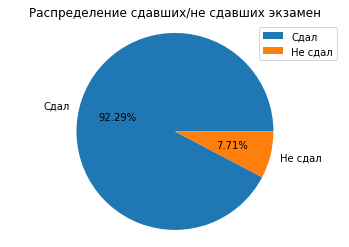

In [7]:
not_passed = data[data['Балл'] < data['Минимальный балл'].mean()].shape[0] / data['Балл'].shape[0]*100
passed = 100 - not_passed

fig, ax = plt.subplots()
ax.pie([passed, not_passed], labels=["Сдал", "Не сдал"], autopct='%1.2f%%')
ax.axis("equal")
ax.set_title("Распределение сдавших/не сдавших экзамен") 
plt.legend()

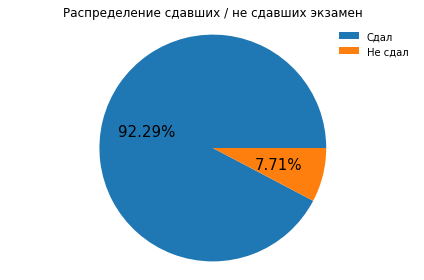

## 6.	Постройте гистограмму по распределению баллов за экзамен. Соответствует ли оно нормальному распределению?

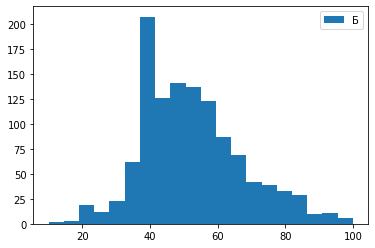

In [10]:
plt.hist(data["Балл"], bins=20)
plt.legend("Балл")

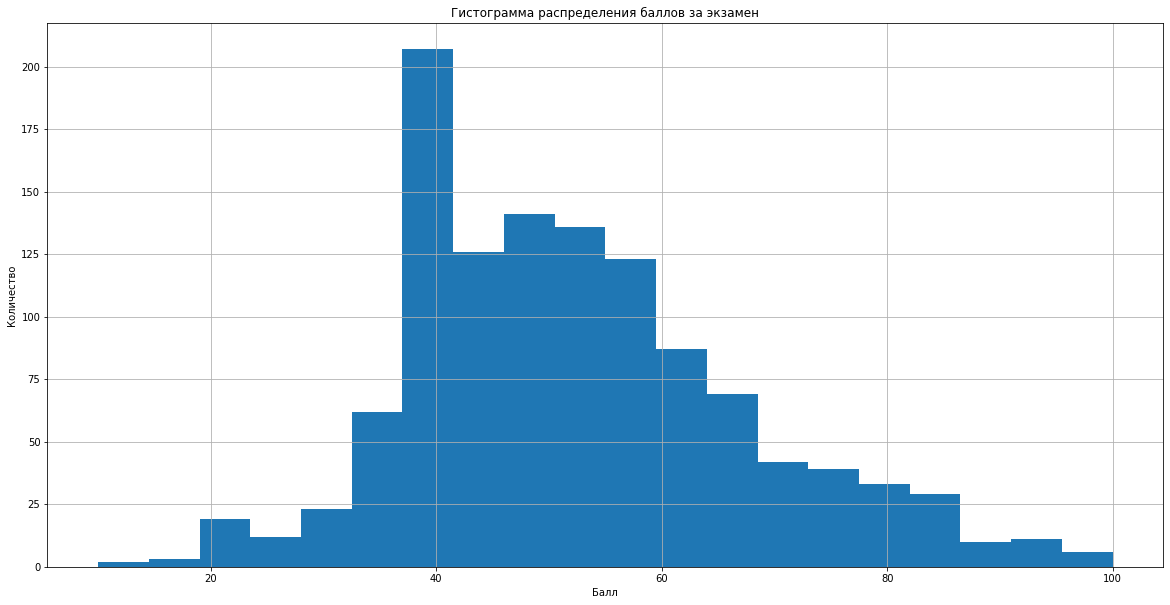

__Нормальному распределению ...

## 7.	Постройте оценку ядерной плотности распределению баллов за экзамен

Text(0.5, 1.0, 'Оценка ядерной плотности распределения баллов за экзамен')

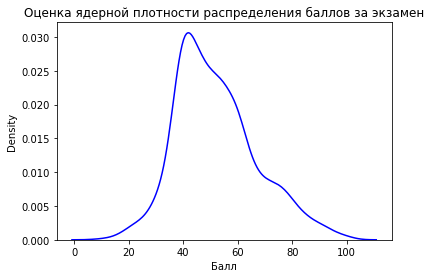

In [11]:
sns.kdeplot(data["Балл"], color='b')
plt.title('Оценка ядерной плотности распределения баллов за экзамен')

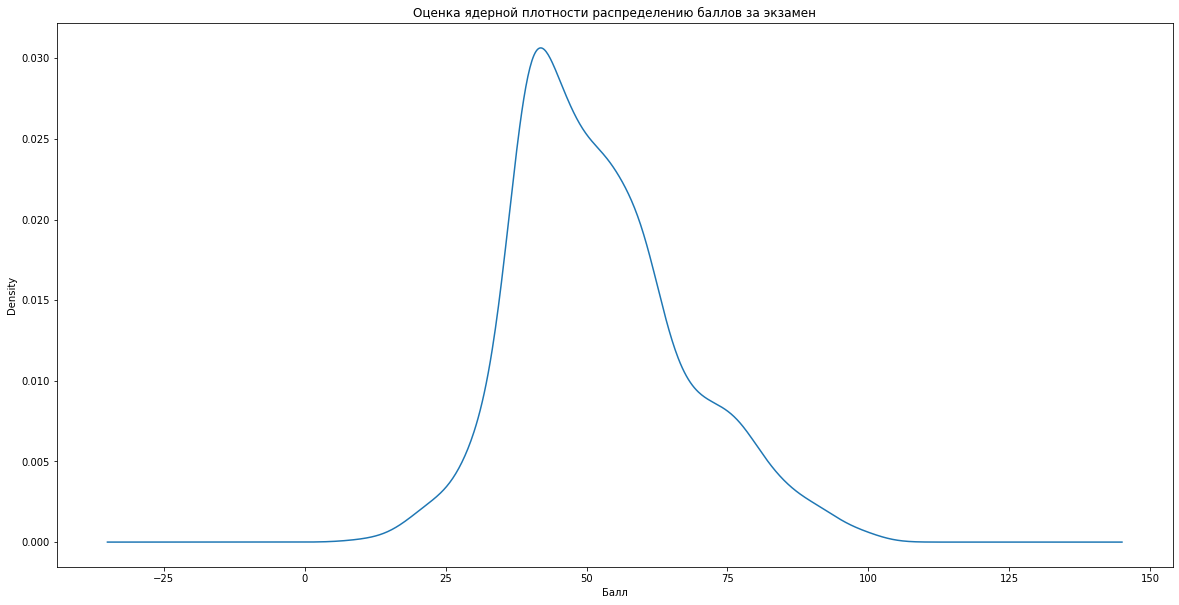

## 8.	Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно». Сделайте графическое представление данного распределения

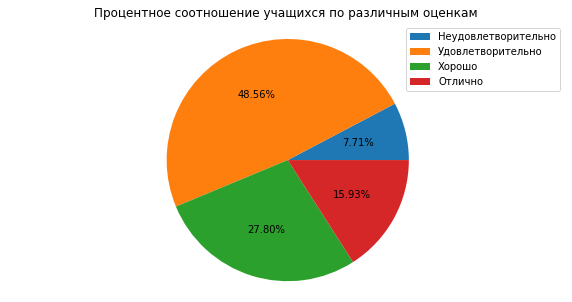

In [12]:
not_yd = data[data['Балл'] <= 35].shape[0] / data['Балл'].shape[0]*100
yd = data[(36 <= data['Балл']) & (data['Балл'] <= 52)].shape[0] / data['Балл'].shape[0]*100
ok = data[(53 <= data['Балл']) & (data['Балл'] <= 67)].shape[0] / data['Балл'].shape[0]*100
excellent = data[data['Балл'] >= 68].shape[0] / data['Балл'].shape[0]*100

fig, ax = plt.subplots(figsize=(10, 5))
ax.pie([not_yd, yd, ok, excellent], autopct='%1.2f%%')
ax.axis("equal")
plt.title("Процентное соотношение учащихся по различным оценкам") 
plt.legend(['Неудовлетворительно', 'Удовлетворительно', 'Хорошо', 'Отлично'])

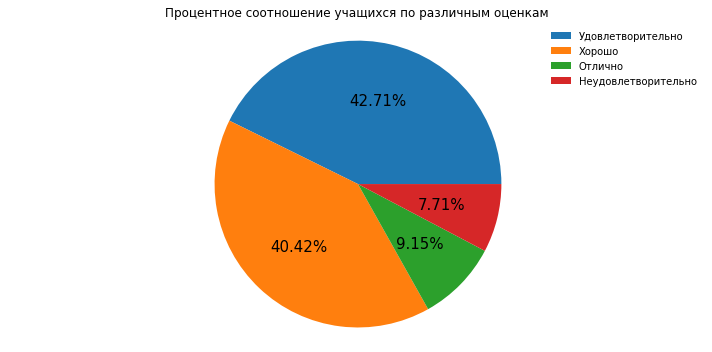

## 9.	Постройте «ящиковые диаграммы», сравнивающие баллы учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно»

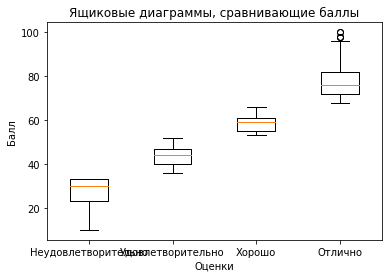

In [13]:
two = data[data['Балл'] <= 35]['Балл']
three = data[(36 <= data['Балл']) & (data['Балл'] <= 52)]['Балл']
four = data[(53 <= data['Балл']) & (data['Балл'] <= 67)]['Балл']
five = data[data['Балл'] >= 68]['Балл']
plt.boxplot([two, three, four, five], labels=["Неудовлетворительно", "Удовлетворительно", "Хорошо", "Отлично"])
plt.title("Ящиковые диаграммы, сравнивающие баллы")
plt.xlabel("Оценки")
plt.ylabel("Балл")
plt.show()

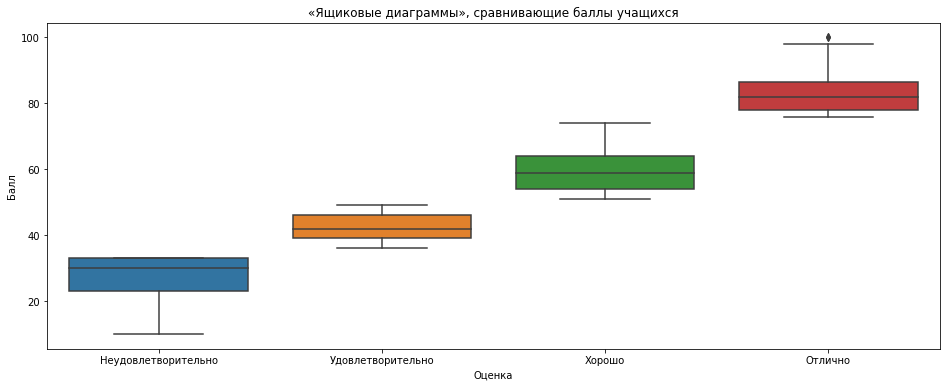

## 10.	Какое процентное соотношение юношей и девушек писало данный экзамен? Представьте графически

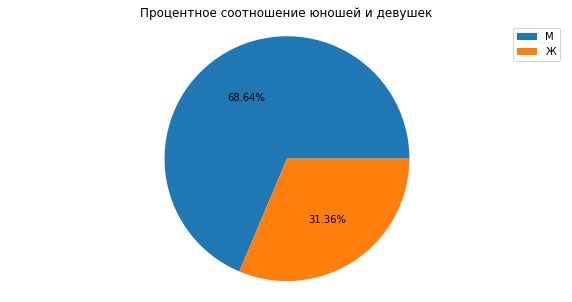

In [14]:
male = data[data['Пол'] == 'М']['Балл'].count()
female = data[data['Пол'] == 'Ж']['Балл'].count()

fig, ax = plt.subplots(figsize=(10, 5))
ax.pie([male, female], autopct='%1.2f%%')
ax.axis("equal")
plt.title("Процентное соотношение юношей и девушек") 
plt.legend(['М', 'Ж'])

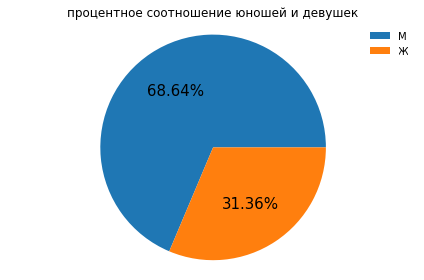

## 11.	Постройте диаграмму рассеивания, позволяющую увидеть средние баллы девушек и юношей

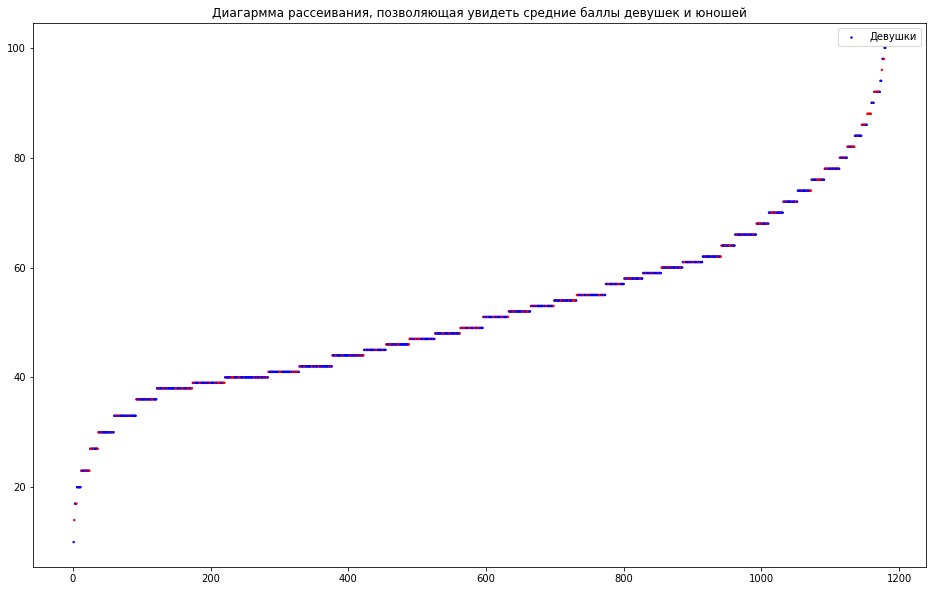

In [15]:
plt.figure(figsize=(16, 10))
ax = plt.scatter(data['№'], data['Балл'], c=np.where(data['Пол']=='М', 'blue', 'red'), s=2)
plt.title('Диагармма рассеивания, позволяющая увидеть средние баллы девушек и юношей')
plt.legend(['Девушки', 'Юноши'])

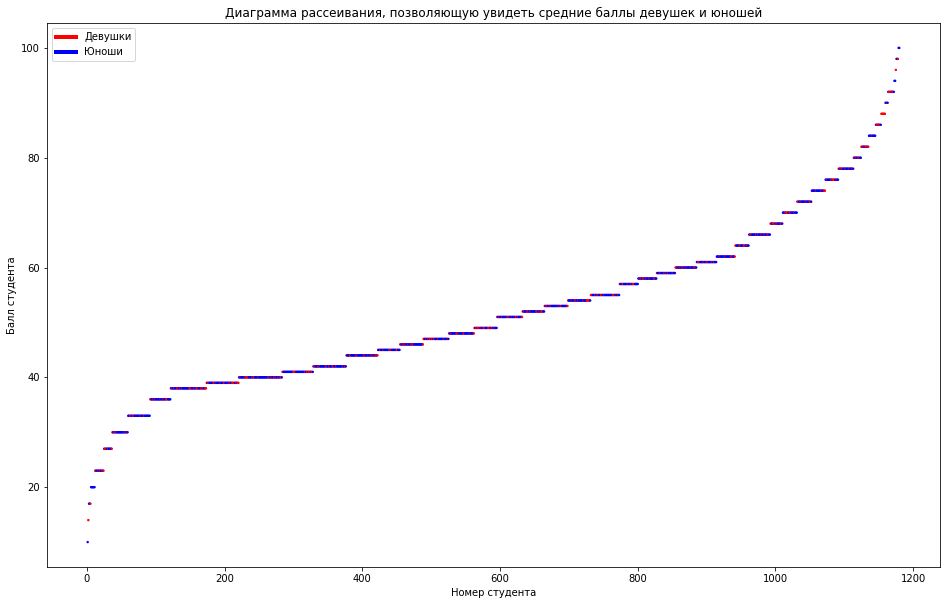

## 12.	Сколько школ (код ППЕ) принимало участие в экзамене?

In [16]:
print("В экзамене принимало участие {} школ".format(data['№ школы'].dropna().unique().size))

В экзамене принимало участие 19 школ


В экзамене принимало участие 19 школ


## 13.	Постройте диаграмму, позволяющую сравнить средние баллы за экзамен по школам. Если какие-нибудь выбросы?

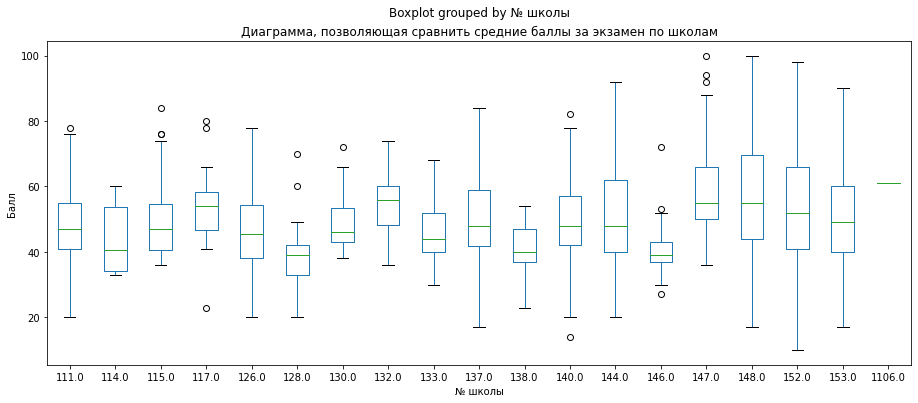

In [17]:
boxplot_13 = data.boxplot(column='Балл', by='№ школы', figsize=(15, 6), grid=False)
plt.title("Диаграмма, позволяющая сравнить средние баллы за экзамен по школам")
plt.xlabel("№ школы")
plt.ylabel("Балл")
plt.show()

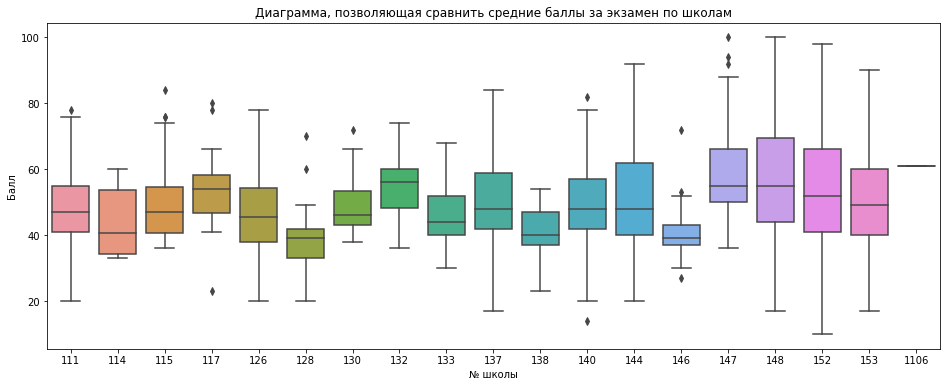

Да, выбросы имеются, например в .... школе сильно выделяется ученик, набравший ... балла. В других школах также имеются выбросы

# __Повышенной сложности:__

## 1.	Сколько всего заданий с кратким ответом? С развернутым ответом?

In [18]:
print("Всего {:.0f} заданий с кратким ответов\nВсего {:.0f} заданий с развернутым ответов"
      .format(data['Задания с кратким ответом'].str.len().min(), 
              data['Задания с развёрнутым ответом'].str.count("\(3\)").max()))

Всего 27 заданий с кратким ответов
Всего 5 заданий с развернутым ответов


Всего 27 заданий с кратким ответов
Всего 5 заданий с развернутым ответов


## 2.	Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В1 … Вк  Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В. Постройте гистограмму, позволяю щую увидеть данное распределение. Какие есть выпады по данному распределению?

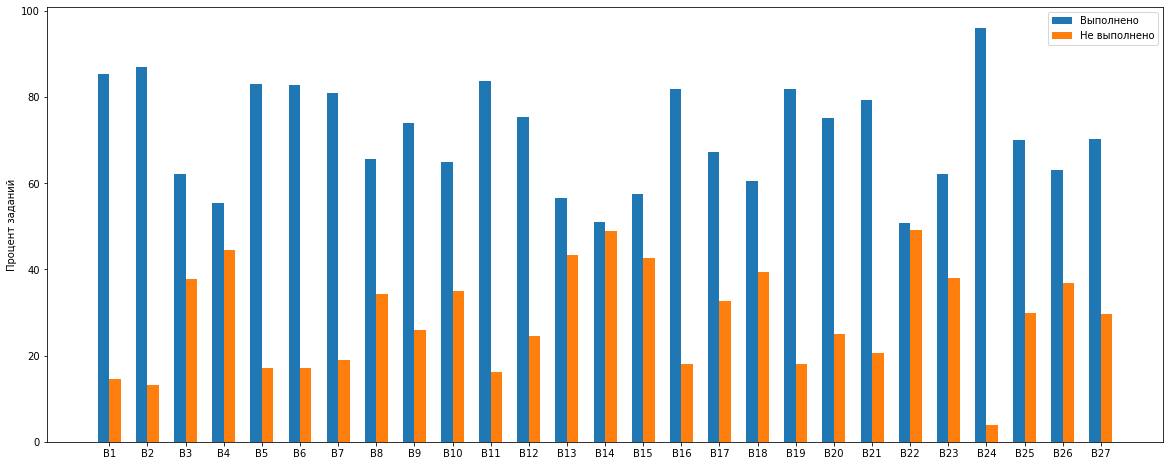

In [66]:
korotk = data['Задания с кратким ответом'].str.len().min()
Task_B = pd.DataFrame(columns=['B'+str(i) for i in range(1, int(korotk)+1 )])

for i in range(data.shape[0]-1):
    res=[]
    for s in data.iloc[i][5]:
        if (s in ['1', '2', '+']):
            res.append('true')
        else:
            res.append('false')
    Task_B.loc[-1] = res
    Task_B.index = Task_B.index + 1

exec_tasks = [ [*Task_B['B'+str(i)].value_counts() ] for i in range(1, int(korotk)+1 )]

executed = [i[0]/sum(i)*100 for i in exec_tasks]
unexecuted = [i[1]/sum(i)*100 for i in exec_tasks]

x = np.arange(len(Task_B.columns))
width = 0.3

fig, ax = plt.subplots(figsize=(20, 8))
col_1 = ax.bar(x-width/2, executed, width, label="Выполнено")
col_2 = ax.bar(x+width/2, unexecuted, width, label="Не выполнено")

ax.set_ylabel('Процент заданий')
ax.set_xticks(x)
ax.set_xticklabels(Task_B.columns)
ax.legend()
plt.show()

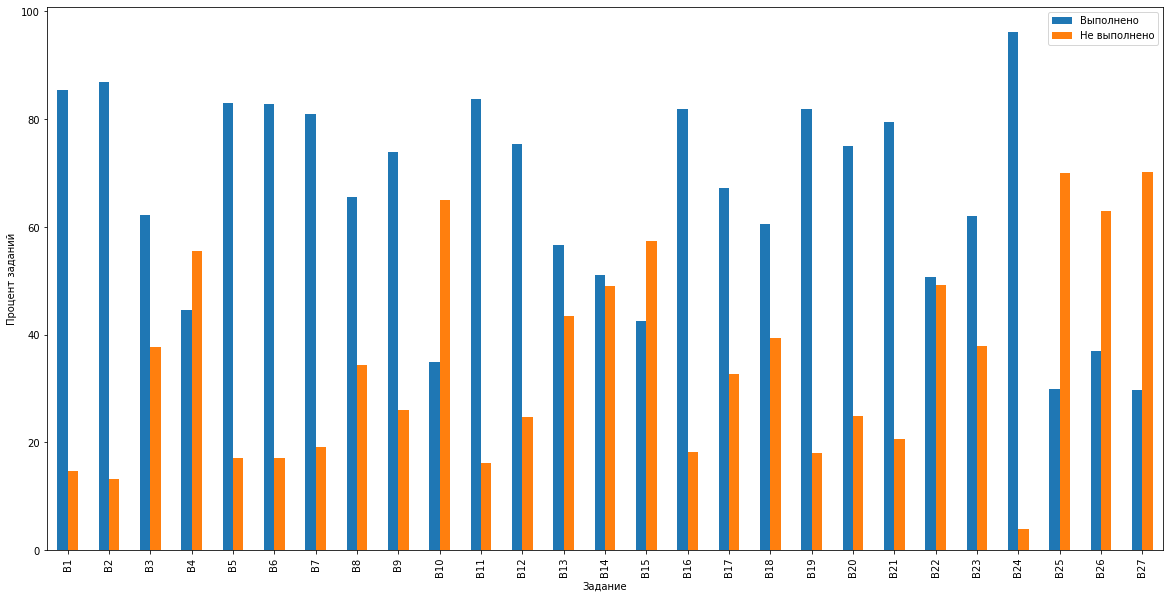

Из явных выпадов видно, что с заданием B24 справилось подавляющее большинство сдававших

## 3.	Аналогично и с типом С (ответы с развернутым ответом)

In [48]:
data['Задания с развёрнутым ответом']

0       0(3)0(3)0(3)0(3)0(3)
1       0(3)0(3)0(3)0(3)0(3)
2       0(3)0(3)0(3)0(3)0(3)
3       0(3)0(3)0(3)0(3)0(3)
4       0(3)0(3)0(3)0(3)0(3)
                ...         
1176    3(3)3(3)3(3)3(3)2(3)
1177    3(3)3(3)3(3)2(3)3(3)
1178    3(3)3(3)3(3)3(3)3(3)
1179    3(3)3(3)3(3)3(3)3(3)
1180                     NaN
Name: Задания с развёрнутым ответом, Length: 1181, dtype: object

In [50]:
'0(3)0(3)0(3)0(3)0(3)'.split('(3)')[:-1]

['0', '0', '0', '0', '0']

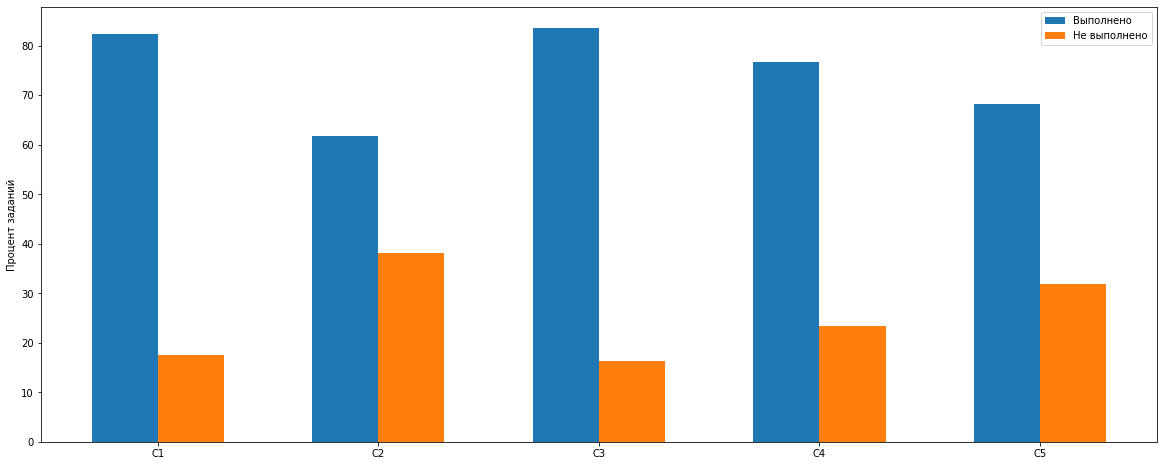

In [70]:
razv = data['Задания с развёрнутым ответом'].str.count("\(3\)").max()
Task_C = pd.DataFrame(columns=['C'+str(i) for i in range(1, int(razv)+1 )])

for i in range(data.shape[0]-1):
    res=[]
    marks = data.iloc[i][6].split('(3)')[:-1]
    for i in marks:
        if i in ['1', '2', '3']:
            res.append('true')
        else:
            res.append('false')
    Task_C.loc[-1] = res
    Task_C.index = Task_C.index + 1

exec_long_tasks = [ [*Task_C['C'+str(i)].value_counts() ] for i in range(1, int(razv)+1 )]

executed_C = [i[0]/sum(i)*100 for i in exec_long_tasks]
unexecuted_C = [i[1]/sum(i)*100 for i in exec_long_tasks]

x_C = np.arange(len(Task_C.columns))
width = 0.3

fig, ax = plt.subplots(figsize=(20, 8))
col_1 = ax.bar(x_C-width/2, executed_C, width, label="Выполнено")
col_2 = ax.bar(x_C+width/2, unexecuted_C, width, label="Не выполнено")

ax.set_ylabel('Процент заданий')
ax.set_xticks(x_C)
ax.set_xticklabels(Task_C.columns)
ax.legend()
plt.show()

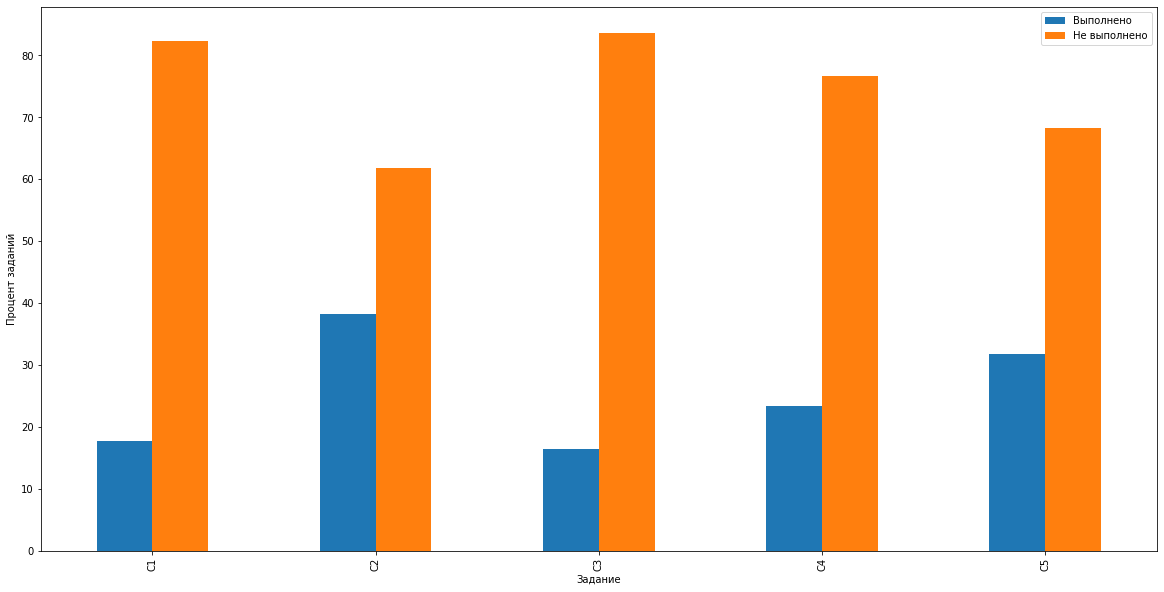

Явных выпадов не видно, но можно заметить, что с C2 справляется больше людей, чем с остальными задачами

## 4.	Сделайте анализ по двум школам:
* А) по всем выполненным заданиям типа В
* Б) по заданиям типа С больше 50%
* В) по среднему балу юношей и девушек


In [73]:
data.groupby('№ школы')['№ школы'].count()

№ школы
111.0      63
114.0      10
115.0      43
117.0      32
126.0      56
128.0      15
130.0      11
132.0      18
133.0      49
137.0      72
138.0      11
140.0     135
144.0      61
146.0      23
147.0      67
148.0     214
152.0     170
153.0     129
1106.0      1
Name: № школы, dtype: int64

148     214
152     170
140     135
153     129
137      72
147      67
111      63
144      61
126      56
133      49
115      43
117      32
146      23
132      18
128      15
138      11
130      11
114      10
1106      1
Name: № школы, dtype: int64

In [85]:
first_school, second_school = 140, 153

first_data = data[data['№ школы'] == first_school]
second_data = data[data['№ школы'] == second_school]

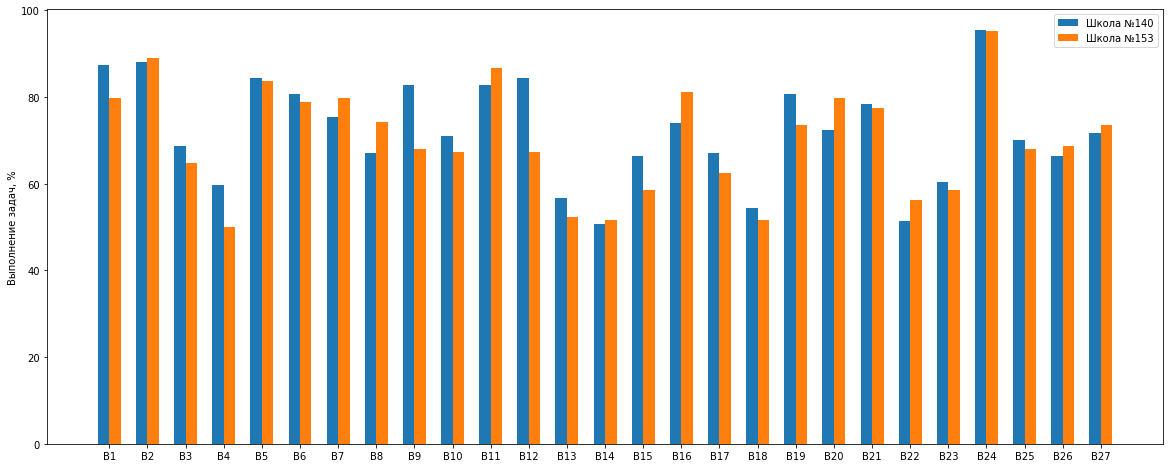

In [86]:
# A
korotk = data['Задания с кратким ответом'].str.len().min()

# Первая школа
Task_B_1 = pd.DataFrame(columns=['B'+str(i) for i in range(1, int(korotk)+1 )])

for i in range(first_data.shape[0]-1):
    res=[]
    for s in first_data.iloc[i][5]:
        if (s in ['1', '2', '+']):
            res.append('true')
        else:
            res.append('false')
    Task_B_1.loc[-1] = res
    Task_B_1.index = Task_B_1.index + 1

exec_tasks_1 = [ [*Task_B_1['B'+str(i)].value_counts() ] for i in range(1, int(korotk)+1 )]
executed_1 = [i[0]/sum(i)*100 for i in exec_tasks_1]

# Вторая школа
Task_B_2 = pd.DataFrame(columns=['B'+str(i) for i in range(1, int(korotk)+1 )])

for i in range(second_data.shape[0]-1):
    res=[]
    for s in second_data.iloc[i][5]:
        if (s in ['1', '2', '+']):
            res.append('true')
        else:
            res.append('false')
    Task_B_2.loc[-1] = res
    Task_B_2.index = Task_B_2.index + 1

exec_tasks_2 = [ [*Task_B_2['B'+str(i)].value_counts() ] for i in range(1, int(korotk)+1 )]
executed_2 = [i[0]/sum(i)*100 for i in exec_tasks_2]

# Построение диаграммы
x = np.arange(len(Task_B_1.columns))
width = 0.3

fig, ax = plt.subplots(figsize=(20, 8))
school_1 = ax.bar(x-width/2, executed_1, width, label="Школа №"+str(first_school))
school_2 = ax.bar(x+width/2, executed_2, width, label="Школа №"+str(second_school))

ax.set_ylabel('Выполнение задач, %')
ax.set_xticks(x)
ax.set_xticklabels(Task_B_1.columns)
ax.legend()
plt.show()

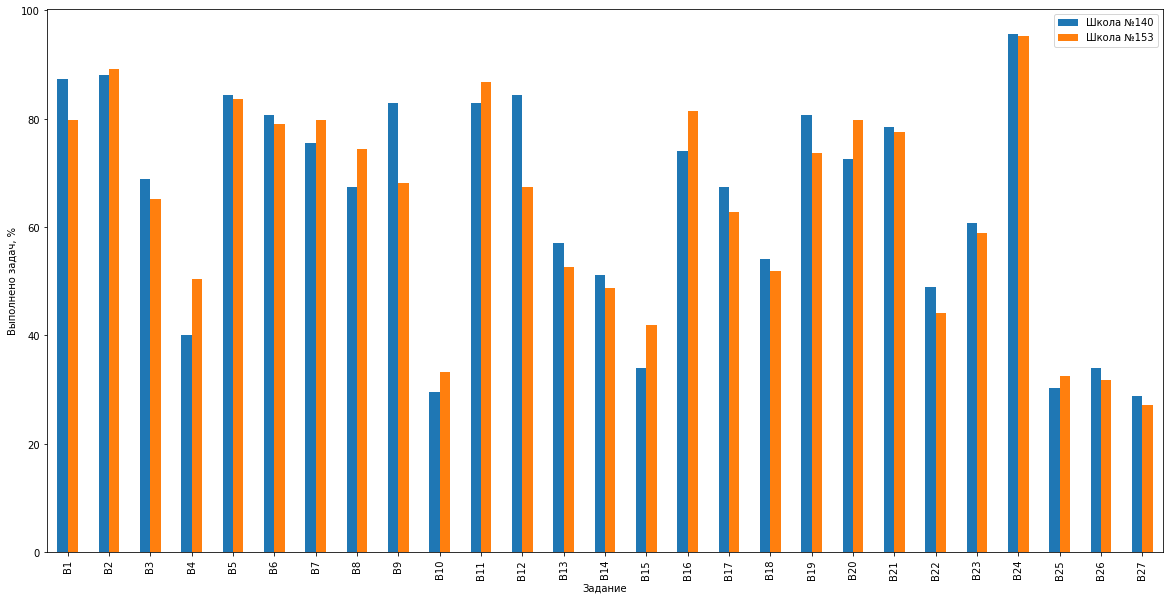

### Б) по заданиям типа С больше 50%

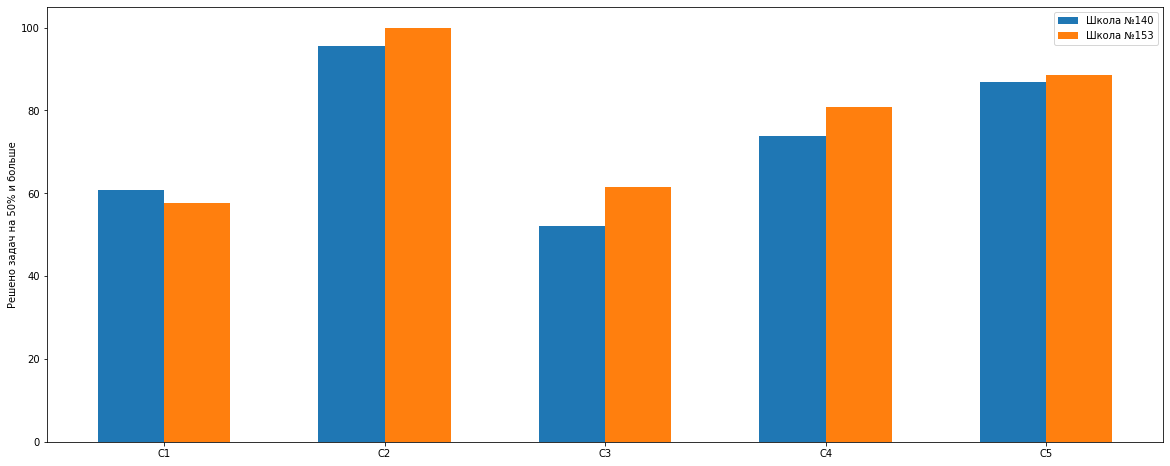

In [104]:
from collections import Counter
razv = data['Задания с развёрнутым ответом'].str.count("\(3\)").max()

percent = 50

# Первая школа
Task_C_1 = pd.DataFrame(columns=['C'+str(i) for i in range(1, int(razv)+1 )])

for i in range(first_data.shape[0]-1):
    res=[]
    marks = first_data.iloc[i][6].split('(3)')[:-1]
    for i in marks:
        if i in ['1', '2', '3']:
            res.append('true')
        else:
            res.append('false')
    
    loc_pers_1 = Counter(res)['true'] / razv * 100
    if loc_pers_1 > percent:
        Task_C_1.loc[-1] = res
        Task_C_1.index = Task_C_1.index + 1
    
exec_long_tasks_1 = [ [*Task_C_1['C'+str(i)].value_counts() ] for i in range(1, int(razv)+1 )]

executed_C_1 = [i[0]/sum(i)*100 for i in exec_long_tasks_1]

# Вторая школа
Task_C_2 = pd.DataFrame(columns=['C'+str(i) for i in range(1, int(razv)+1 )])

for i in range(second_data.shape[0]-1):
    res=[]
    marks = second_data.iloc[i][6].split('(3)')[:-1]
    for i in marks:
        if i in ['1', '2', '3']:
            res.append('true')
        else:
            res.append('false')
            
    loc_pers_2 = Counter(res)['true'] / razv * 100
    if loc_pers_2 > percent:
        Task_C_2.loc[-1] = res
        Task_C_2.index = Task_C_2.index + 1

exec_long_tasks_2 = [ [*Task_C_2['C'+str(i)].value_counts() ] for i in range(1, int(razv)+1 )]

executed_C_2 = [i[0]/sum(i)*100 for i in exec_long_tasks_2]

# Построение диаграммы
x_C = np.arange(len(Task_C_1.columns))
width = 0.3

fig, ax = plt.subplots(figsize=(20, 8))
school_1_C = ax.bar(x_C-width/2, executed_C_1, width, label="Школа №"+str(first_school))
school_2_C = ax.bar(x_C+width/2, executed_C_2, width, label="Школа №"+str(second_school))

ax.set_ylabel('Решено задач на 50% и больше')
ax.set_xticks(x_C)
ax.set_xticklabels(Task_C_1.columns)
ax.legend()
plt.show()

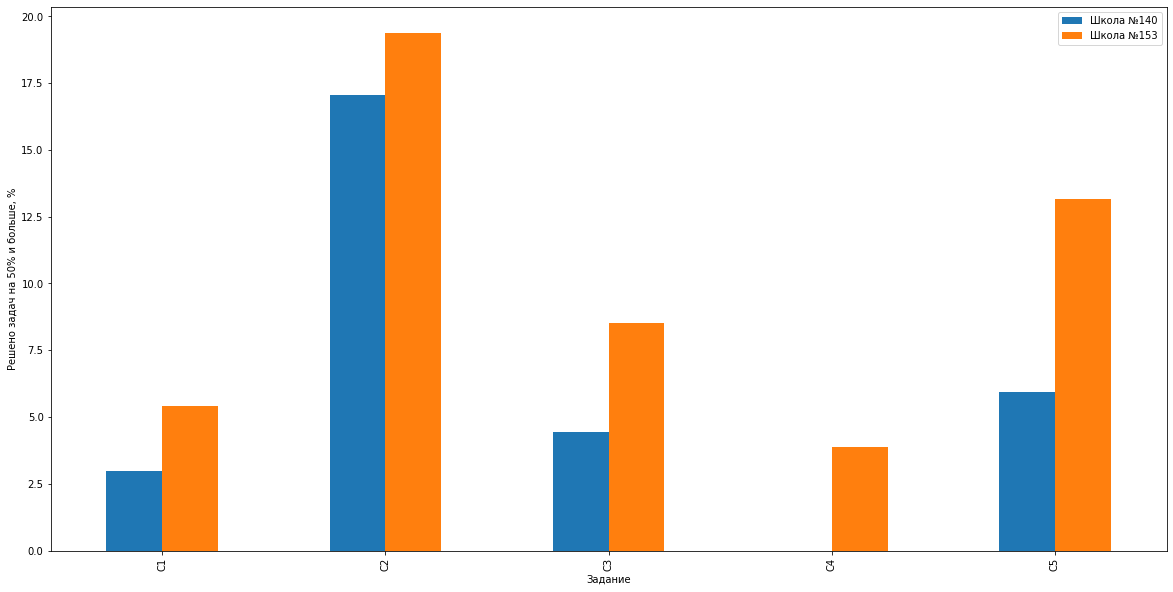

В школе №140 никто не решил С4 более, чем на 50%

### в) по среднему балу юношей и девушек

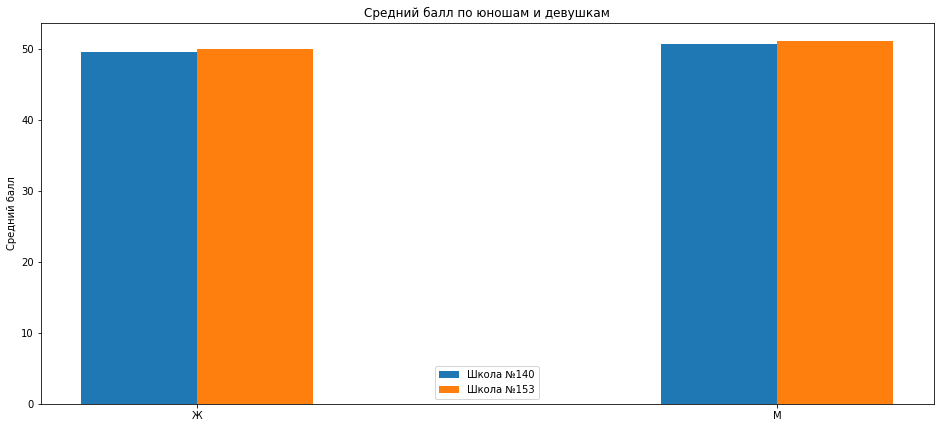

In [126]:
fig, ax = plt.subplots(figsize=(16, 7))

x = np.arange(2)
width = 0.2

ax.bar(x-width/2, first_data.groupby('Пол').mean()['Балл'],width=width, label="Школа №"+str(first_school))
ax.bar(x+width/2, second_data.groupby('Пол').mean()['Балл'],width=width, label="Школа №"+str(second_school))

ax.set_ylabel('Средний балл')
ax.set_xticks((0, 1))
ax.set_xticklabels(['Ж', 'М'])
ax.legend()
plt.title('Средний балл по юношам и девушкам')
plt.show()

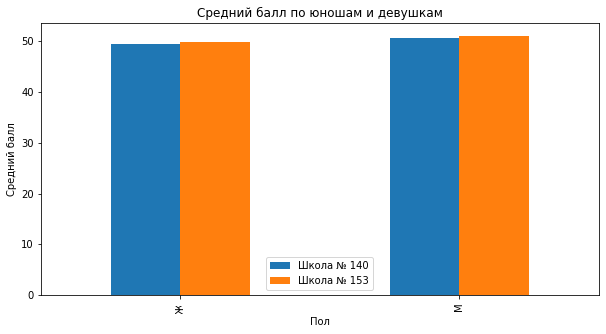